# Exercises Week 10: Simulating stochasticity in gene expression

**Course**: [Topics in life sciences engineering](https://moodle.epfl.ch/enrol/index.php?id=17061) (BIO-411)

**Professors**:  _Gönczy Pierre_, _Naef Felix_, _McCabe Brian Donal_

SSV, MA, 2022-2023

$$\require{mhchem}$$  
$$\require{dcolumn}$$
$$\require{longtable}$$
$$\require{array}$$
$$\require{multirow}$$

In today's exercise session, we will simulate the chemical master equation (CME) of two processes using the Gillespie algorithm.  
In *Exercise 1*, you will consider a simple birth-death process and study its properties.  
In *Exercise 2*, you will simulate a chemical oscillator known as the *Brusselator*.

# Exercise 1: Probabilistic description of the Birth-death process
Let's consider a simple birth-death process in which a species $x$ is produced at a rate $s$ and degraded at a rate $k$:  

\begin{equation*}
\frac{dx}{dt} = s - kx 
\end{equation*}
The four possible events can be described as follow:
\begin{eqnarray*}
&&n-1 \longrightarrow n \textrm{ with rate } s \\
&&n \longrightarrow n+1 \textrm{ with rate } s \\
&&n+1 \longrightarrow n  \textrm{ with rate } k(n+1) \\
&&n \longrightarrow n-1 \textrm{ with rate } kn
\end{eqnarray*}

From those events, we can describe the master equation which gives the probability $P(n,t)$ to have $n$ molecules of the compound at time $t$:  

\begin{equation*}
\frac{dP(n,t)}{dt} = sP(n-1,t) + k(n+1)P(n+1,t) - sP(n,t) - knP(n,t)
\end{equation*}

### Question 1
You will simulate the birth-death process using the Gillespie algorithm code provided below.
1. Study the Gillespie code and describe its main steps. 
2. Fill the missing parts (annoted with "FILL HERE").
3. Run the simulation multiple times and describe the results.
4. Verify that the steady-state distribution of the molecule $n$ follows a Poisson distribution.
5. How are ($s$, $k$) changing this distribution?

### Answer 1
1. Write your answers here
2. Write your answers here
3. Write your answers here
4. Write your answers here

In [1]:
#import librairies
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.integrate import odeint
from scipy.special import gammaln

#### One species Gillespie algorithm:

In [175]:
n = [0] # initial condition
t = [0]
s = 20 # synthesis rate, here in molecules per unit time, not concentration per unit time.
k = 1  # degradation rate in hr^-1
t_end = 100 # total time in hr (should be choosen according to the half-life time)

while t[-1] < t_end:
     
    current_n = n[-1]
    rates = [s, k * current_n]
    #rates = #FILL HERE
    rates_tot = sum(rates)
    
    #pick the next time interval
    dt = np.random.exponential(scale=1/rates_tot) # scale is 1/lambda
    t.append(t[-1] + dt)
    
    rand_uniform = np.random.random()
    
    #simplified version for just two reactions
    #production
    if rand_uniform <= (rates[0] / rates_tot):
         n.append(current_n + 1)
        # FILL HERE
    #degradation
    else:
         n.append(current_n - 1)
        # FILL HERE

#### plot the trajectory and histogram

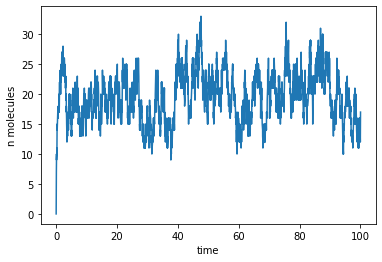

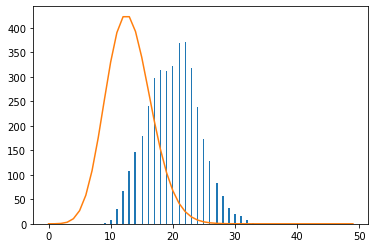

In [176]:
plt.plot(t,n)
plt.xlabel("time")
plt.ylabel("n molecules")
plt.show()   

#remove a suitable transient and plot the histogram
plt.hist(n[50:],100)
ntot=len(n[50:])
# plt.show()

def Poisson(lam, n):
    logp=n*np.log(lam)-lam-gammaln(n+1)
    return np.exp(logp)
    
# get random numbers from a poisson distribution
lam=13
nn=np.arange(50)
p=Poisson(lam, nn)
p=p*ntot
plt.plot(nn, p)
plt.show()

# Exercise 2: The Brusselator

The Brusselator (proposed in 1967 in Brussels by R. Lefever I. Prigogine et G. Nicolis) described a chemical oscillator governed by the following chemical reactions:

$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { reaction } & \text { reaction rate} & \text { dX/dt } & \text { dY/dt } \\
\ce{\emptyset ->[k_1] X} & v_1=k_1 & +v_1 & 0 \\
\ce{X ->[k_2] Y} & v_2=k_2 X & -v_2 & +v_2\\
\ce{2X + Y ->[k_3] 3X} & v_3=k_3X^2Y & +v_3 & -v_3 \\
\ce{X ->[k_4]\emptyset} & v_4=k_4X & -v_4 & 0 \\
\hline
\end{array}
\end{aligned}
$$

The determinisitic equations for the concentrations $X$ and $Y$ are given by:

\begin{eqnarray*}
&&\frac{dX}{dt} = k_1 -k_2X + k_3X^2Y -k_4X \\
&&\frac{dY}{dt} = k_2X -k_3X^2Y
\end{eqnarray*}

For example, the unit of $k_1$ is concentration over time. In the stochastic description of this process, we have to associate to each reaction a transition propability:

$$
\begin{aligned}
&\begin{array}{ccc}
\hline \hline \text { reaction } & \text {transition rate}\\
\ce{n ->[r_1] n +1} & r_1=k_1 \Omega\\
\ce{n ->[r_2] m} & r_2=k_2 n\\
\ce{2n + m ->[r_3] 3n} & r_3=k_3n(n-1)m\Omega^{-2}\\
\ce{n ->[r_4]n-1} & r_4=k_4 n\\
\hline
\end{array}
\end{aligned}
$$

with $\Omega$ the system size (or volume). Note the dependies of the different reaction rates on $\Omega$, which ensures that the transition rates are in the right units (1/time).

### Question 1
1. Using the code below, simulate the deterministic system.
2. Plot X and Y in function of t. Describe how the parameters affect the oscillatory pattern.
3. Plot the phase portrait (X vs. Y) and describe how the parameter affect the limit cycle.

### Answer 1
1.

In [177]:
## function definition
def func(y, t, k1, k2, k3, k4):
    X, Y = y
    return [k1-k2*X + k3*(X**2)*Y-k4*X, k2*X - k3*(X**2)*Y] #

def simulation(func, par, x0 = None, t = None):
    k_1=par[0]
    k_2=par[1]
    k_3=par[2]
    k_4=par[3]

    xx=odeint(func, x0, t, args=(k_1,k_2,k_3,k_4))
    return xx

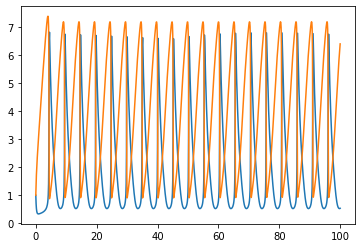

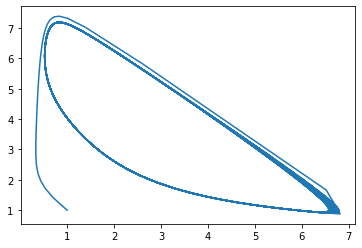

In [178]:
#initial conditions
x0=[1,1] #[X, Y]
par=[2,6,1,1]
time = np.linspace(0,100,1001)
xx=simulation(func, par, x0, time)

plt.figure(0)
plt.plot(time, xx[:,0],label = 'X(t)')
plt.plot(time, xx[:,1],label = 'Y(t)')
plt.figure(1)
plt.plot(xx[:,0],xx[:,1])


2. Write your answers here
3. Write your answers here

### Question 2
Simulate the Brusselator process using the Gillespie algorithm code for two species provided below.
1. Study the Gillespie code and describe its main steps. 
2. Fill the missing parts (annoted with "FILL HERE") to simulate the Brusselator. 
3. Run the simulation and describe the result. In particular, plot X and Y in function of time as well as the phase portrait X vs. Y.
4. How are the parameters affecting the evolution of X and Y, in particular the system size $\Omega$?  
5. Optional: how does the number of reactions scale with $\Omega$?

#### Gillespie simulation of the Brusselator

In [180]:
# note that we use pyhton lists [] to store the trajectories
#
# note that this simulation can take a bit of time, so try with short
# t_end first until the code works, or with a low omega

X = [1]
Y = [1] 
t = [0]

#the stochiometric matrix S
S=np.array([[1, 0], [-1, 1], [1, -1], [-1, 0]])

t_end = 100
omega = 100 #system size

#par=[2,6,2,1]
k1 = 2
k2 = 6
k3 = 1
k4 = 1

while t[-1] < t_end:

    c_X = X[-1]
    c_Y = Y[-1]
    rates = [k1*omega, c_X*k2, c_X*(c_X-1)*c_Y*k3/(omega**2), k4*c_X]
#     rates = [k1*omega, c_X*k2, #c_X*(c_X-1)*c_Y*k3/(omega**2), k4*c_X]

    
    rates_tot = sum(rates)
    rates_cumsum=np.cumsum(rates)/rates_tot
    
    #pick the time of the next reaction
    dt = np.random.exponential(scale=1.0/rates_tot) # scale is 1/lambda
    t.append(t[-1] + dt)
    
    #pick the reaction
    rand= np.random.random()
    i=0
    while rand >= rates_cumsum[i]:
        i=i+1;
    chosen_react=i
    
    X.append(c_X+S[chosen_react,0])
    Y.append(c_Y+S[chosen_react,1])


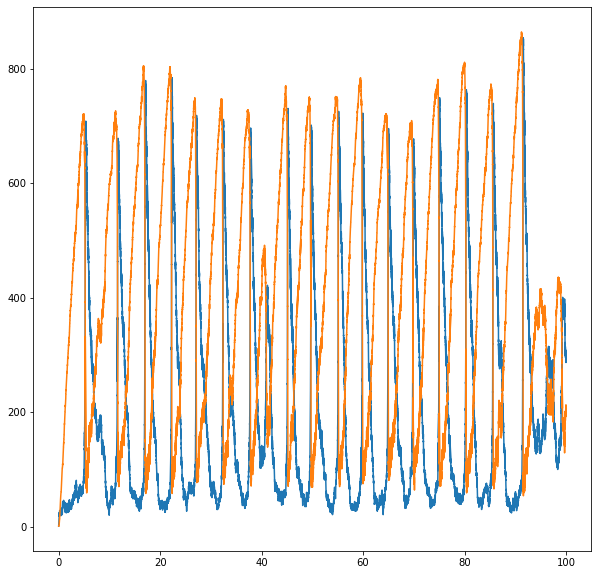

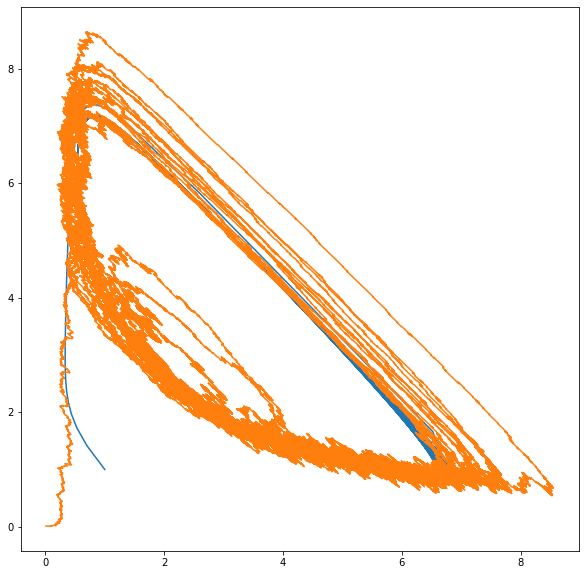

In [181]:
plt.figure(figsize=(10,10))
plt.plot(t, X,label = 'X(t)')
plt.plot(t, Y,label = 'Y(t)')
plt.show()
plt.figure(figsize = (10,10))
plt.plot(xx[:,0],xx[:,1])
plt.plot(np.array(X)/omega,np.array(Y)/omega)
plt.show()